In [15]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)

## Unitary Evolution

In [16]:
H = 2 * np.pi * 0.1 * sigmax()

In [17]:
psi0 = basis(2, 0)

In [18]:
times = np.linspace(0.0, 10.0, 1000)

In [19]:
result = sesolve(H, psi0, times, [sigmaz(), sigmay()])

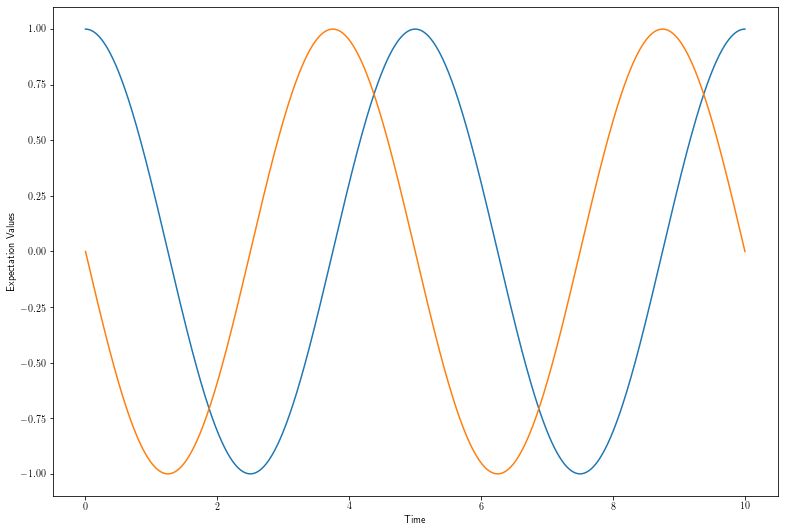

In [20]:
fig = plt.figure(figsize =(13 ,9))
ax = fig.add_subplot(1,1,1)
ax.plot(times, result.expect[0])
ax.plot(times, result.expect[1])

ax.set_xlabel('Time')
ax.set_ylabel('Expectation Values')

plt.show()

## Non-unitary Evolution

In [21]:
H = 2 * np.pi * 0.1 * sigmax()
psi0 = basis(2, 0)
times = np.linspace(0.0, 40.0, 1000)

In [22]:
result = mesolve(H, psi0, times, [np.sqrt(0.05) * sigmax()], [sigmaz(), sigmay()])

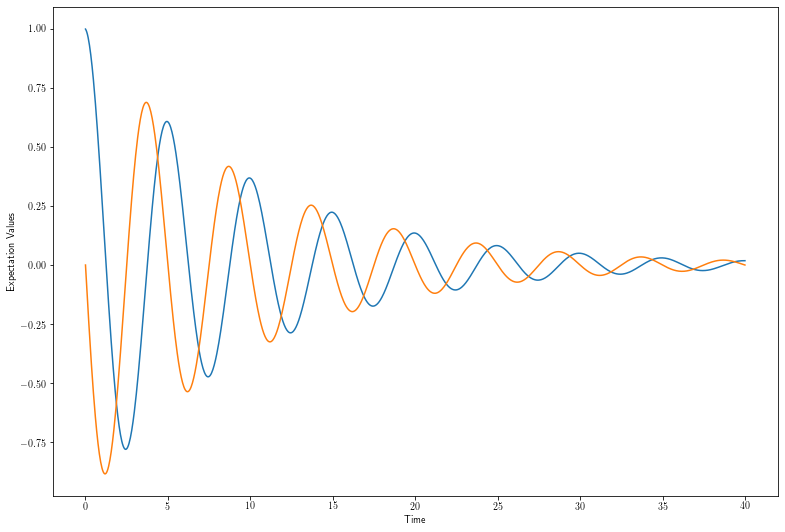

In [23]:
fig = plt.figure(figsize =(13 ,9))
ax = fig.add_subplot(1,1,1)
ax.plot(times, result.expect[0])
ax.plot(times, result.expect[1])

ax.set_xlabel('Time')
ax.set_ylabel('Expectation Values')

plt.show()

In [24]:
times = np.linspace(0.0, 10.0, 200)
psi0 = tensor(fock(2,0), fock(10,5))
a = tensor(qeye(2), destroy(10))
sm = tensor(destroy(2), qeye(10))
H = 2 * np.pi * a.dag() * a + 2 * np.pi * sm.dag() * sm + 2 * np.pi * 0.25 * (sm * a.dag() + sm.dag() * a)
result = mesolve(H, psi0, times, [np.sqrt(0.1)*a], [a.dag()*a, sm.dag()*sm])

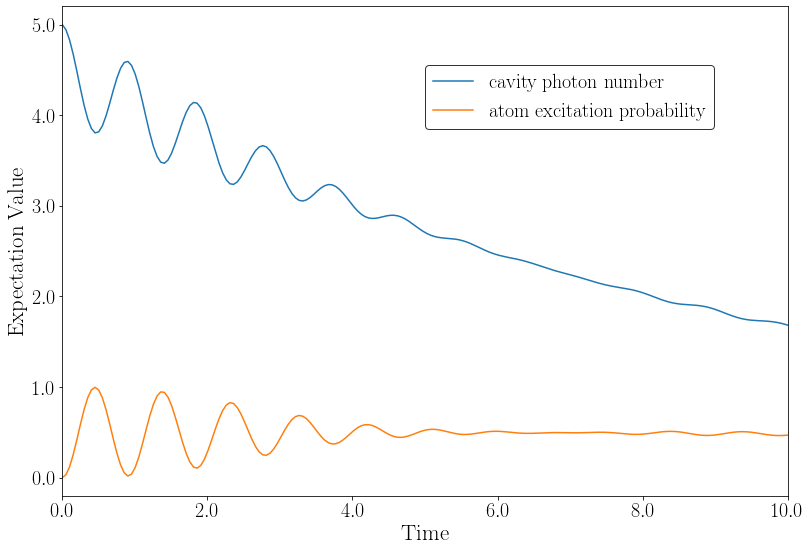

In [37]:
fig = plt.figure(figsize =(13 ,9))
ax = fig.add_subplot(1,1,1)
ax.plot(times, result.expect[0], label=r'$\mathrm{cavity\;photon\;number}$')
ax.plot(times, result.expect[1], label=r'$\mathrm{atom\;excitation\;probability}$')




ax.set_xlim(0, 10)
ax.set_xticks(np.linspace(0, 10, 6, endpoint=True))
ax.set_xticklabels([r'$%.1f$'%(0 + i*2.0) for i in range(6)], size=20)

ax.set_ylim(-0.2, 5.2)
ax.set_yticks(np.linspace(0, 5, 6, endpoint=True))
ax.set_yticklabels([r'$%.1f$'%(0 + i) for i in range(6)], size=20)



plt.legend(loc=(0.50, 0.75), fontsize=20).get_frame().set_edgecolor('k')


ax.set_xlabel('$\mathrm{Time}$', fontsize=23)
ax.set_ylabel('$\mathrm{Expectation\;Value}$', fontsize=23)

#plt.show()
fig.savefig("Jaynes-Cummings-Dynamics.pdf", bbox_inches="tight")